In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.,5.)

In [2]:
x= torch.rand([2000,4000])
x.shape

torch.Size([2000, 4000])

In [3]:
torch.device('cuda:0')

device(type='cuda', index=0)

In [4]:
# для перемещения вычислений на GPU 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
# проверяем где лежит
device

device(type='cuda', index=0)

In [5]:
# перемещаем тензор на GPU
x_cuda = x.to(device) 


In [6]:
# задаём вычисления для тензора Х на CPU
%time y = x**2 *x - x *10


CPU times: user 23.7 ms, sys: 49.6 ms, total: 73.3 ms
Wall time: 82.3 ms


In [7]:
# задаём вычисления для тензора Х на GPU
%time y_cuda = x_cuda**2 *x_cuda - x_cuda *10


CPU times: user 961 µs, sys: 982 µs, total: 1.94 ms
Wall time: 1.79 ms


In [8]:
x = torch.tensor(
   [[2.,4.,6.,8.],
    [1.,3.,5.,7.],
    [4.,5.,8.,9.]], requires_grad=True # включаем историю requires_grad=True
)
x


tensor([[2., 4., 6., 8.],
        [1., 3., 5., 7.],
        [4., 5., 8., 9.]], requires_grad=True)

In [9]:
# Просмотрим историю вычислений 
func = 15* (x**3).sum()  

func.backward()
print (x.grad, '<-- gradient')


tensor([[ 180.,  720., 1620., 2880.],
        [  45.,  405., 1125., 2205.],
        [ 720., 1125., 2880., 3645.]]) <-- gradient


In [10]:
print(
f'{func.grad_fn}\n\
{func.grad_fn.next_functions[0][0]}\n\
{func.grad_fn.next_functions[0][0].next_functions[0][0]}\n\
{func.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]}'
)

# смотрим историю вычислений


### Net 

In [44]:
x_train = torch.rand(100)
x_train = x_train * 5 - 2
print ('Диапазон случайных чисел', x_train.min(), x_train.max())
# случайные числа

Диапазон случайных чисел tensor(-1.9294) tensor(2.8527)


In [45]:
# создаем y train - второй набор данных
y_train = torch.cos(x_train)**2


Text(0.5, 1.0, 'y = cos^2(x)')

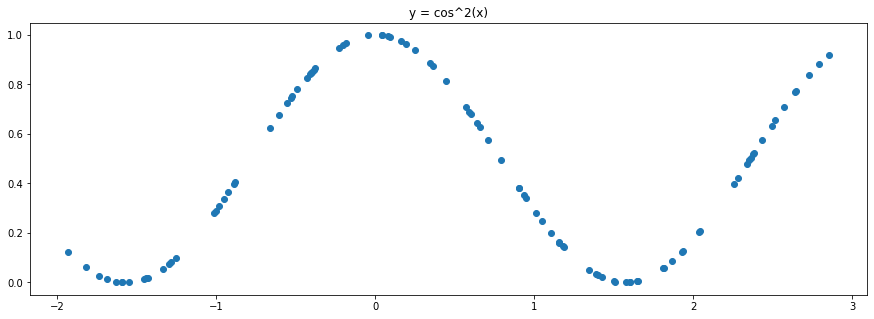

In [46]:
plt.plot(x_train, y_train, 'o') # 
plt.title('y = cos^2(x)')

Text(0.5, 1.0, 'случайный шум')

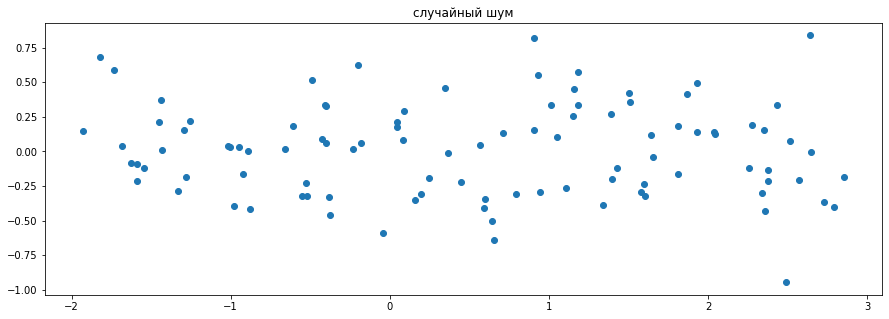

In [48]:
noize = torch.randn(y_train.shape) / 3

plt.plot(x_train, noize, 'o') # 
plt.title('случайный шум')


Text(0.5, 1.0, 'noize + y_train')

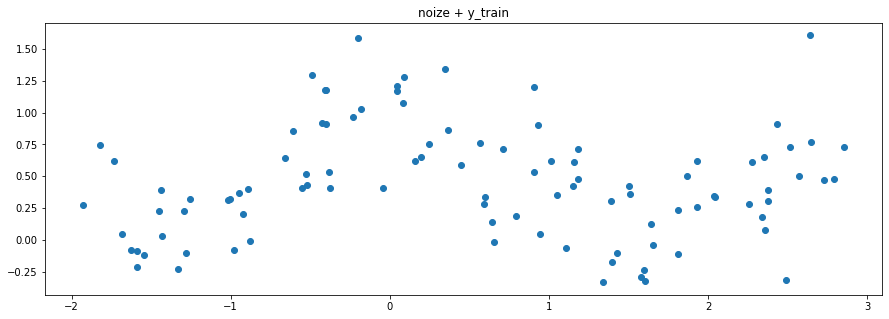

In [49]:
y_train2 = noize + y_train

plt.plot(x_train, y_train2, 'o') # 
plt.title('noize + y_train')

In [50]:
x_train.unsqueeze_(1)
y_train2.unsqueeze_(1) ; # ; - что бы не выводил на экран результат 

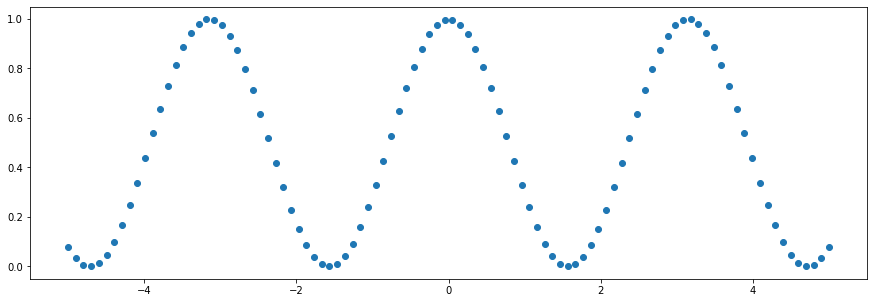

In [80]:
x_val = torch.linspace(-5, 5, 100)
y_val = torch.cos(x_val.data)**2

plt.plot(x_val, y_val, 'o')

In [81]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1) ;

In [82]:
class OurNet(torch.nn.Module):
  def __init__(self, n_hod_n):
    super(OurNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hod_n)
    self.act1= torch.nn.Sigmoid()
#    self.fc2 = torch.nn.Linear(n_hod_n, n_hod_n)
#    self.act2= torch.nn.Sigmoid()
#    self.act3= torch.nn.Sigmoid()
    self.fc4 = torch.nn.Linear(n_hod_n, 1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
#    x = self.fc2(x)
#    x = self.act2(x)
#    x = self.fc3(x)
#    x = self.act3(x)
    x = self.fc4(x)
    return x
    

In [83]:
# в скобках указываем сколько нейронов в слоях
ourNet = OurNet(100) 


In [84]:
import numpy

def pred(net, x,y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', c='b', label='Образец (эталон)')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'x', c='g', label='Результат сетки')
  plt.legend(loc='upper left')

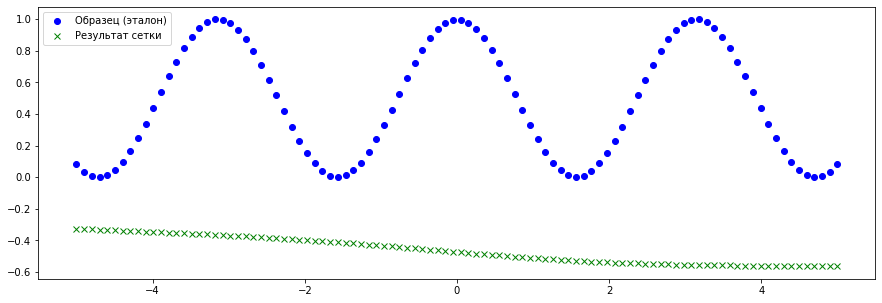

In [85]:
pred(ourNet, x_val, y_val)

In [86]:
# добавляем оптимайзер для уменьшения коэф. обучения
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.001)

In [87]:
# сделаем функцию MSE (подсчет среднеквадратичной ошибки)

def los(pred, true):
  sq = (pred-true)**2
  return sq.mean()

In [88]:
for e in range(10000):
  optimizer.zero_grad()

  y_pred = ourNet.forward(x_train)
  loss_val = los(y_pred, y_train)
  loss_val.backward()
  optimizer.step()

  if not e % 1000:
    print (loss_val)

    

tensor(0.9859, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)


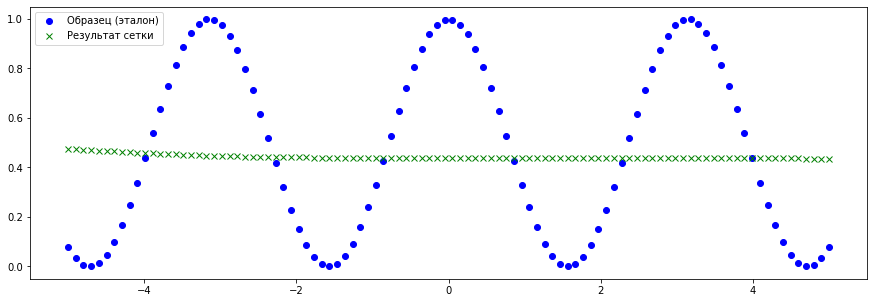

In [89]:
pred(ourNet, x_val, y_val)

In [90]:
ourNet = OurNet(500)  # увеличиваем в нейронке число нейронов до 55
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.001)

In [91]:
for e in range(10000):
  optimizer.zero_grad()

  y_pred = ourNet.forward(x_train)
  loss_val = los(y_pred, y_train)
  if not e % 1000:
    print (loss_val)

  loss_val.backward()
  optimizer.step()

tensor(0.1779, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)


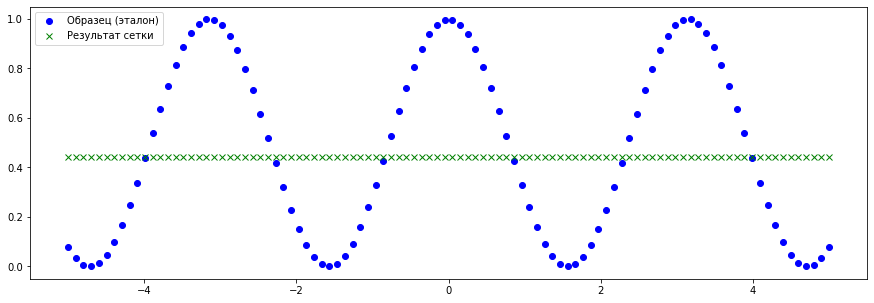

In [92]:
pred(ourNet, x_val, y_val)

tensor(0.3782, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)
tensor(0.1217, grad_fn=<MeanBackward0>)


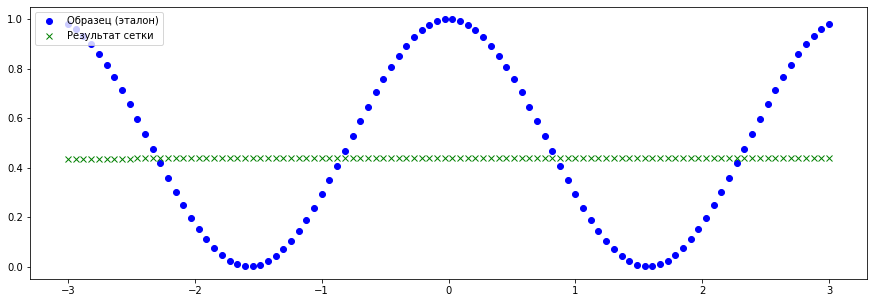

In [76]:
ourNet = OurNet(155) 
optimizer = torch.optim.Adam(ourNet.parameters(), lr=0.001)

for e in range(5000):
  optimizer.zero_grad()

  y_pred = ourNet.forward(x_train)
  loss_val = los(y_pred, y_train)
  if not e % 1000:
    print (loss_val)

  loss_val.backward()
  optimizer.step()

pred(ourNet, x_val, y_val)